In [6]:
# My little btc quote bot

In [65]:
import requests
import json
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt



In [66]:
#baseurl = 'https://blocmarket.herokuapp.com/'
# baseurl = 'http://127.0.0.1:5000/'
baseurl = 'http://127.0.0.1:7000/'

In [86]:
# set up quote api
headers = {}
apikey = 'VVOJSV9CUU9JRCSE'
quoteurl = 'https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency=BTC&to_currency=USD&apikey=' + apikey
# Test realtime quote 
response = requests.get(quoteurl, headers=headers)
# Look at the quote
response.json()

{'Realtime Currency Exchange Rate': {'1. From_Currency Code': 'BTC',
  '2. From_Currency Name': 'Bitcoin',
  '3. To_Currency Code': 'USD',
  '4. To_Currency Name': 'United States Dollar',
  '5. Exchange Rate': '3976.37000000',
  '6. Last Refreshed': '2019-02-23 04:14:42',
  '7. Time Zone': 'UTC'}}

In [87]:
quote = float(response.json()['Realtime Currency Exchange Rate']['5. Exchange Rate'])
quote

3976.37

In [88]:
# Create a new user
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [89]:
# View response as json
response.json()

{'signingKey': 'f62937113da9a48c2b1ff8c81b911dbf138626ec0099a15e34e32c67c75ca7e2',
 'traderId': '5',
 'verifyKey': '08ab3fc71faa9e99455a55e5923e48baacfa1fbf592fe848c5002cd4e420e870'}

In [90]:
# Copy keys and traderid from response
sk = response.json()['signingKey']
vk = response.json()['verifyKey']
tId = int(response.json()['traderId'])


In [91]:
# Create a new market
mkRtId = tId
mkBrId = 1


url = baseurl + 'createMarket'
content_makemarket = {"signingKey": sk,
                        "traderId": tId, 
                        "verifyKey": vk,
                        "marketRootId": mkRtId, 
                        "marketBranchId": mkBrId, 
                        "marketMin": 2500,
                        "marketMax":4500,
                        "marketDesc": 'BTCUSD'}
# Post market
response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)


In [92]:
# response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
# View response as json
response.json()

{'allChecks': "{'inputChk': True, 'marketLimitChk': True, 'traderIdChk': True, 'marketId': '3', 'marketRangeChk': True, 'marketIndChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': True, 'timeChk': True}",
 'checks': 'True',
 'marketBranchId': 1,
 'marketId': 3,
 'marketMax': 4500,
 'marketMin': 2500,
 'marketRootId': 5,
 'traderId': 5}

In [93]:
# Save market id from response
mkId = response.json()['marketId']
quote

3976.37

In [94]:
# Create a trade
tradeurl = baseurl+'createTrade'

content_maketrade = {"signingKey": sk,
                     "traderId": tId,
                     "verifyKey": vk,
                     "marketId": int(mkId),
                     "price":quote,
                     "quantity": 1}
response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)

In [95]:
# View response as json
response.json()

{'allChecks': "{'inputChk': True, 'traderIdChk': True, 'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 3,
 'price': 3976.37,
 'quantity': 1,
 'traderId': 5}

In [96]:
content_makemarket

{'signingKey': 'f62937113da9a48c2b1ff8c81b911dbf138626ec0099a15e34e32c67c75ca7e2',
 'traderId': 5,
 'verifyKey': '08ab3fc71faa9e99455a55e5923e48baacfa1fbf592fe848c5002cd4e420e870',
 'marketRootId': 5,
 'marketBranchId': 1,
 'marketMin': 2500,
 'marketMax': 4500,
 'marketDesc': 'BTCUSD'}

In [ ]:


stillQuoting = True
i=0
prevQuote = quote

while stillQuoting==True:
    # Quote from source
    i+=1
    response = requests.get(quoteurl, headers=headers)
    quote = float(response.json()['Realtime Currency Exchange Rate']['5. Exchange Rate'])
    if (prevQuote == quote):
        time.sleep(3*60)
    else:     
        # Make a bid
        content_maketrade['price'] = quote-1
        content_maketrade['quantity'] =1
        response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)
        # Make an offer
        content_maketrade['price'] = quote+1
        content_maketrade['quantity'] = -1
        response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)
        time.sleep(3*60)

        # Remove bid 
        content_maketrade['price'] = quote-1
        content_maketrade['quantity'] =-1
        response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)
        # Remove offer
        content_maketrade['price'] = quote+1
        content_maketrade['quantity'] = 1
        response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)
        print('Price for iteration ' + str(i) + ' : ' + str(content_maketrade['price']))
        prevQute = quote

Price for iteration 1 : 3977.17
Price for iteration 2 : 3976.04
Price for iteration 3 : 3974.91
Price for iteration 4 : 3972.15
Price for iteration 5 : 3972.16


In [43]:
content_maketrade

{'signingKey': 'f77e8e20b146f2a75abdb360f74bb5f6061a87a7b8069ea2368802f454668918',
 'traderId': 7,
 'verifyKey': '90ff93d666f1d5935f8ff338b3e928fdff75f13e4189b462de6fd3c69ee47cf1',
 'marketId': 7,
 'price': 3615.07,
 'quantity': -1}

In [44]:
content_maketrade['quantity'] = quote

In [58]:
response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)

In [59]:
response.json()

{'allChecks': "{'inputChk': True, 'traderIdChk': True, 'marketChk': False, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': False}",
 'checks': 'False',
 'marketId': 7,
 'price': 3615.36,
 'quantity': 1,
 'traderId': 8}

'http://127.0.0.1:7000/createTrade'

In [197]:
# View summary of trader for a particular trader
url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)

In [198]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketRootId,marketBranchId,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.50,1,1,False,2019-02-09 07:42:46.453,1,1,2500,4500,2499.50,4499.50
1,1,3654.85,-1,1,False,2019-02-09 07:45:23.233,1,1,2500,4500,1154.85,-845.15
10,1,3654.42,-1,1,False,2019-02-09 07:46:27.127,1,1,2500,4500,1154.42,-845.58
11,1,3652.42,-1,1,False,2019-02-09 07:49:27.231,1,1,2500,4500,1152.42,-847.58
12,1,3649.60,-1,1,False,2019-02-09 07:49:29.240,1,1,2500,4500,1149.60,-850.40
13,1,3647.60,-1,1,False,2019-02-09 07:52:29.344,1,1,2500,4500,1147.60,-852.40
14,1,3652.97,-1,1,False,2019-02-09 07:52:31.267,1,1,2500,4500,1152.97,-847.03
15,1,3650.97,-1,1,False,2019-02-09 07:55:31.372,1,1,2500,4500,1150.97,-849.03
16,1,3648.03,-1,1,False,2019-02-09 07:55:33.366,1,1,2500,4500,1148.03,-851.97
17,1,3646.03,-1,1,False,2019-02-09 07:58:33.471,1,1,2500,4500,1146.03,-853.97


In [18]:
# Get summary for this market and plot

url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
a = pd.read_json(response.json())
a = a[a['marketId'] == mkId]
a = a.set_index(a['timeStampUTC'])


Text(0.5, 1.0, 'Time series for market 5 / trader 5')

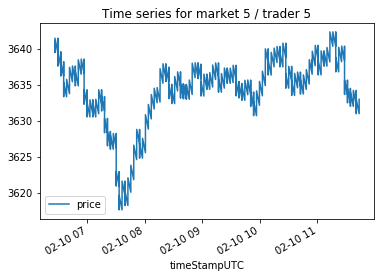

In [19]:
plt.figure(); a['price'].plot(); plt.legend(loc='best'); plt.title('Time series for market ' + str(mkId) + ' / trader ' +str(tId))

In [20]:
bids = a[a['quantity']<0]
asks = a[a['quantity']>0]

Text(0.5, 1.0, 'Time series for market 5 / trader 5')

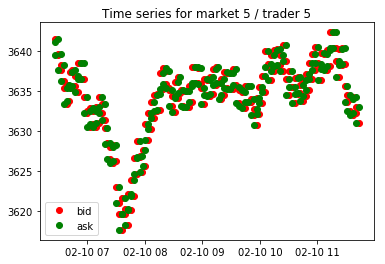

In [21]:
plt.figure(); 
plt.plot(bids['timeStampUTC'],bids['price'], 'ro');
plt.plot(asks['timeStampUTC'],asks['price'], 'go');
plt.legend(('bid', 'ask')); plt.title('Time series for market ' + str(mkId) + ' / trader ' +str(tId))
